In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [13]:
#load dataset
df=pd.read_csv('/content/liver_cancer_prediction.csv')

In [6]:
df.head()

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No


In [4]:
df.shape

(160292, 25)

#***EDA(Explotary Data Analysis):-***

In [6]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

In [7]:
#dataset describe
df.describe()

,Population,Incidence_Rate,Mortality_Rate,Age,Survival_Rate,Cost_of_Treatment
count,1.602920e+05,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,7.527321e+08,18.523468,15.525234,54.640088,49.957811,25275.608904
std,4.328283e+08,9.513400,8.376871,20.188217,23.036437,14307.105453
min,1.011968e+06,2.000035,1.000080,20.000000,10.000548,500.397303
25%,3.772400e+08,10.319582,8.286968,37.000000,30.129577,12858.138774
50%,7.548388e+08,18.529822,15.565488,55.000000,49.858143,25349.819261
75%,1.126721e+09,26.751354,22.808666,72.000000,69.833652,37672.515875
max,1.499993e+09,34.999952,29.999829,89.000000,89.998005,49999.791824


In [8]:
#missing values
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Incidence_Rate,0
Mortality_Rate,0
Gender,0
Age,0
Alcohol_Consumption,0
Smoking_Status,0
Hepatitis_B_Status,0


In [9]:
#check the duplicated rows
df.duplicated().sum()

0

In [17]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Alcohol_Consumption', 'Smoking_Status', 'Hepatitis_B_Status',
       'Hepatitis_C_Status', 'Obesity', 'Diabetes', 'Rural_or_Urban',
       'Seafood_Consumption', 'Herbal_Medicine_Use', 'Healthcare_Access',
       'Preventive_Care', 'Prediction'],
      dtype='object')

In [18]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age'], dtype='object')

#***Data Visualization:-***

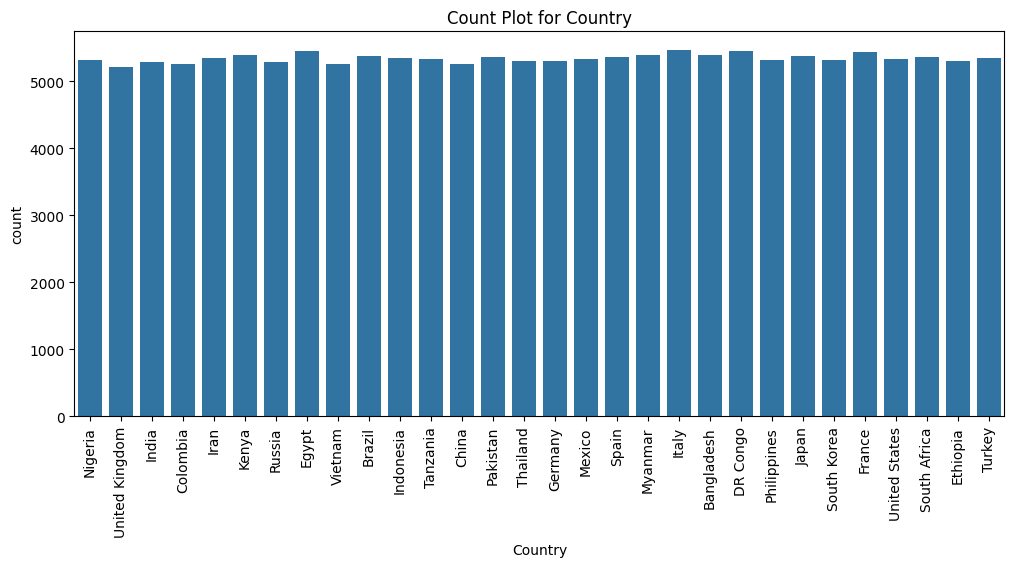

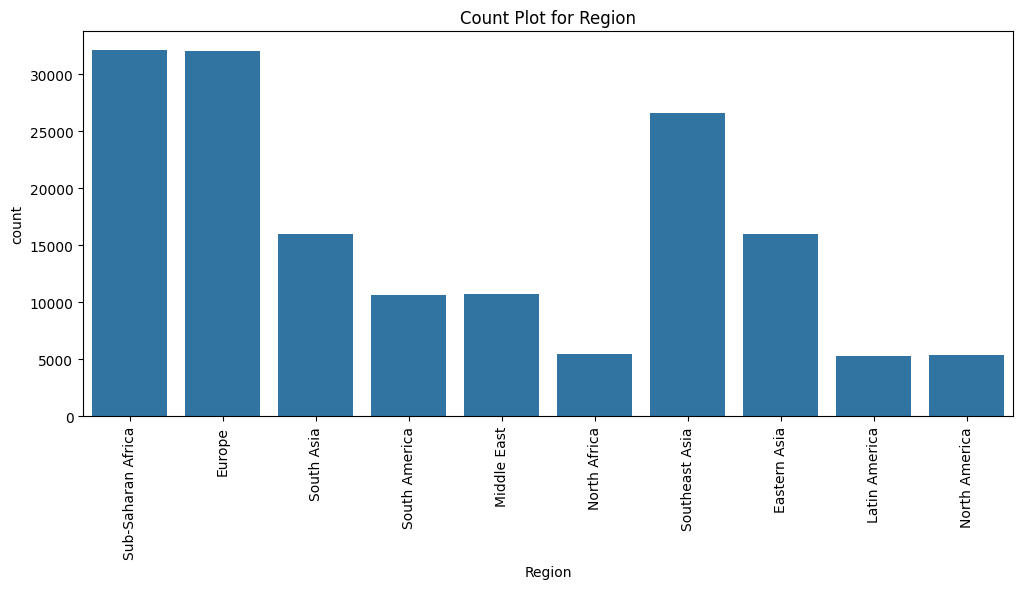

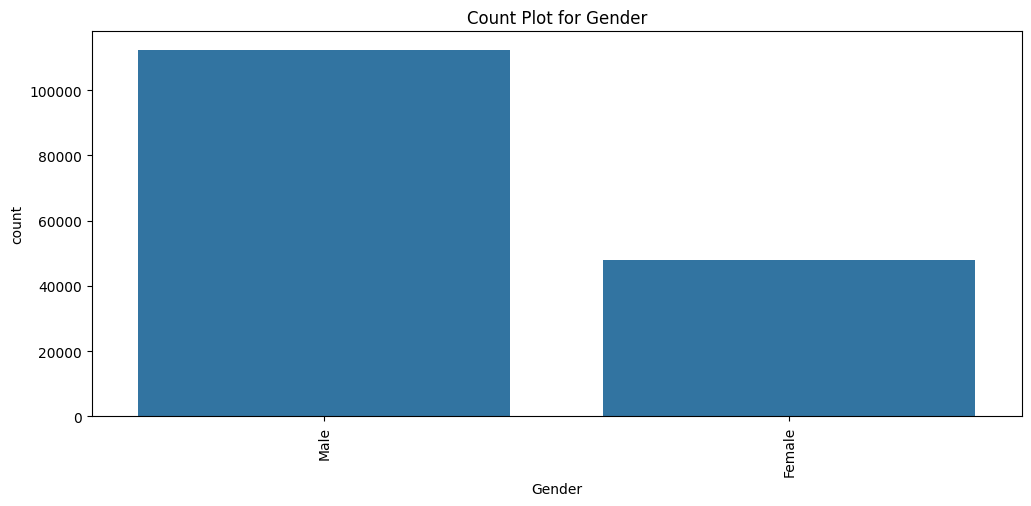

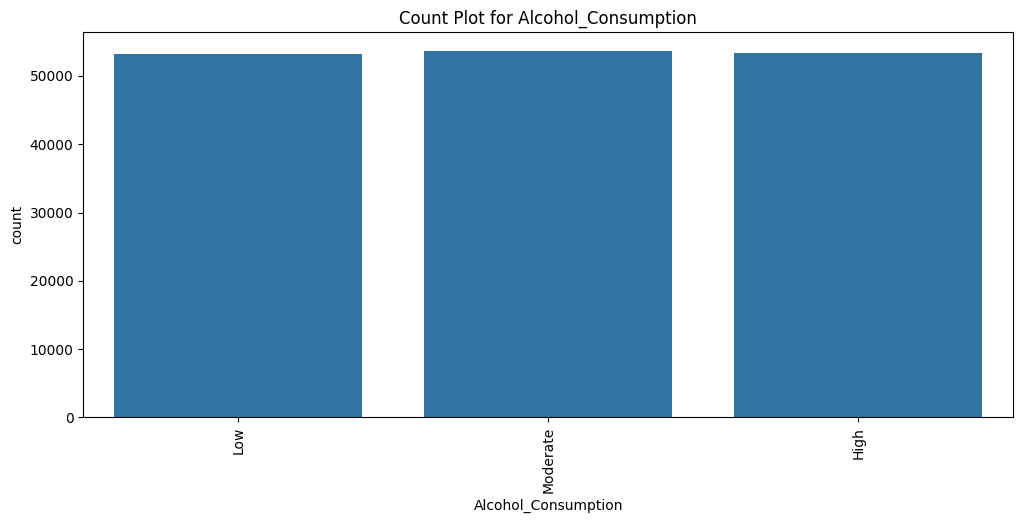

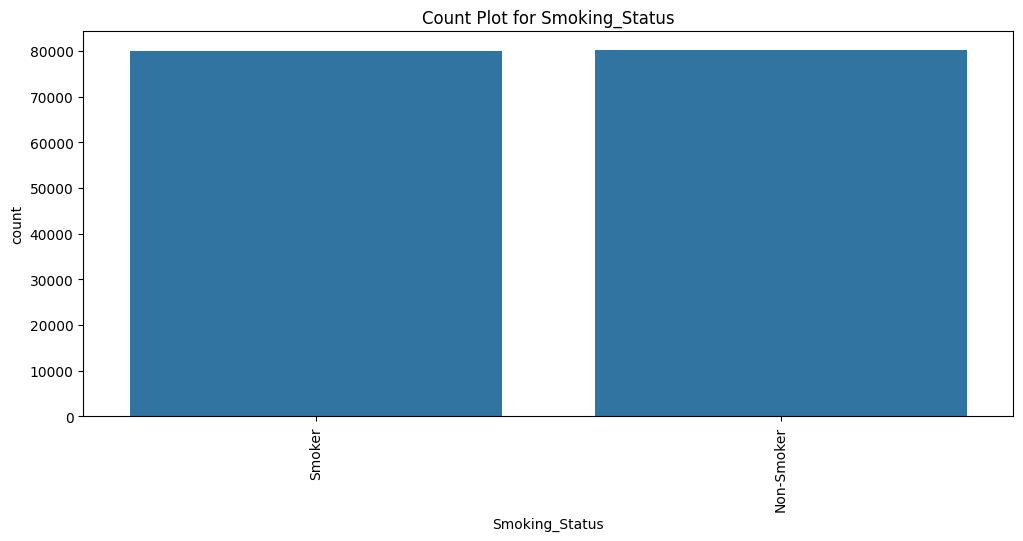

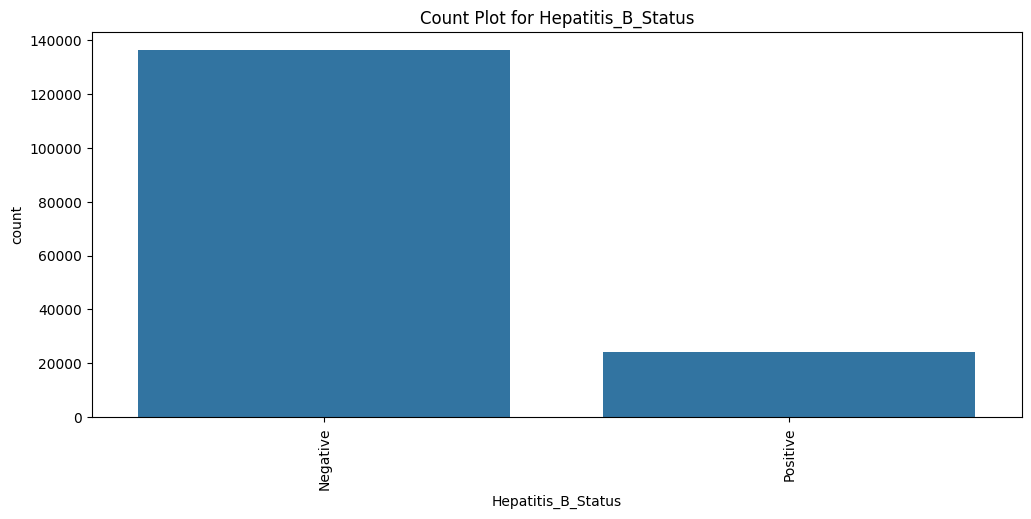

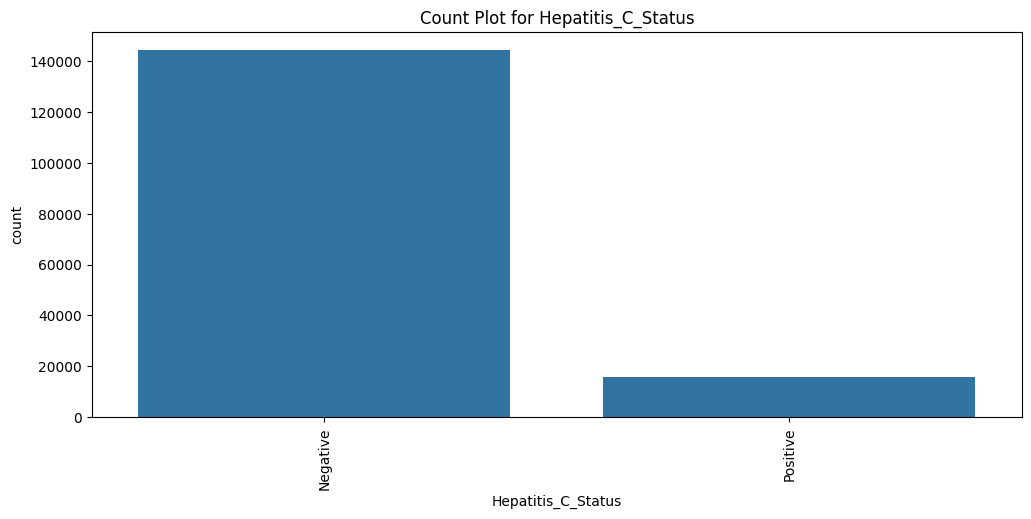

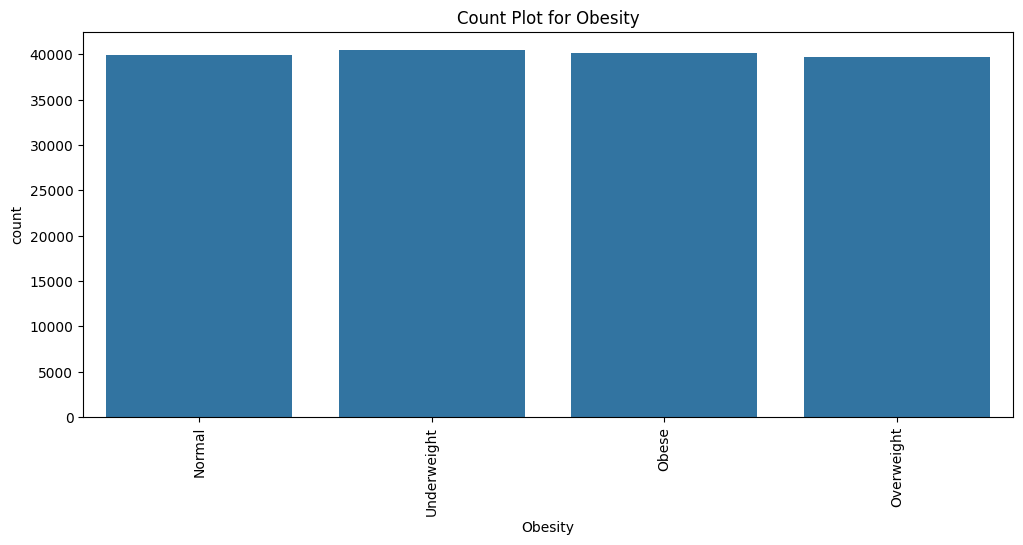

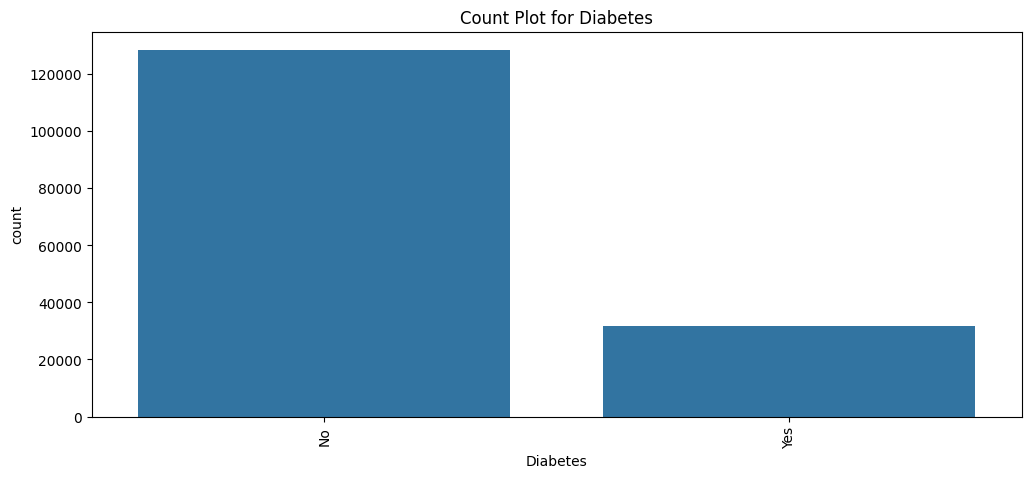

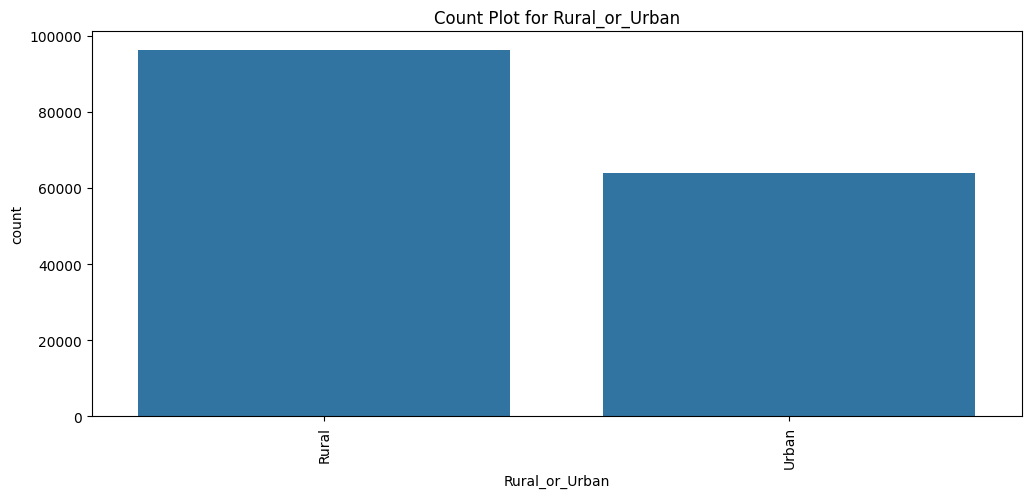

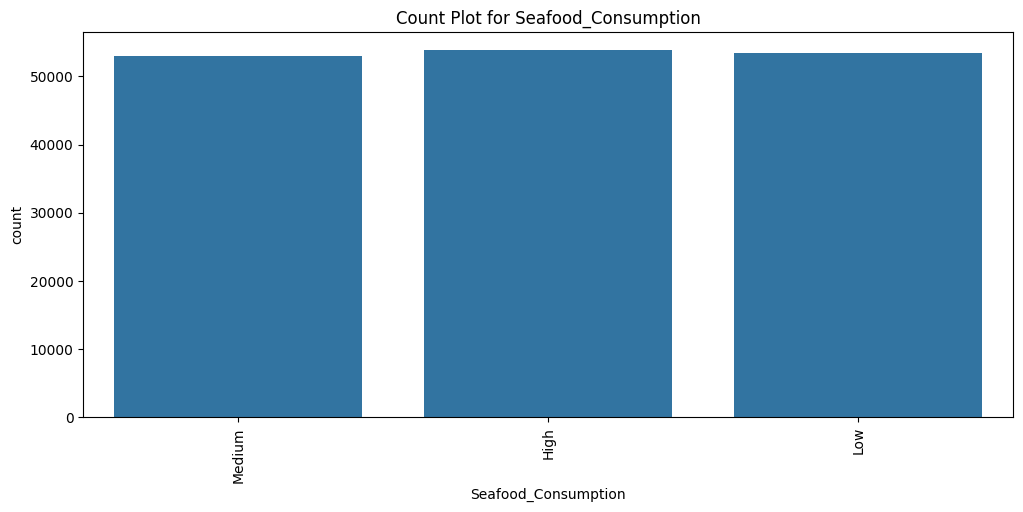

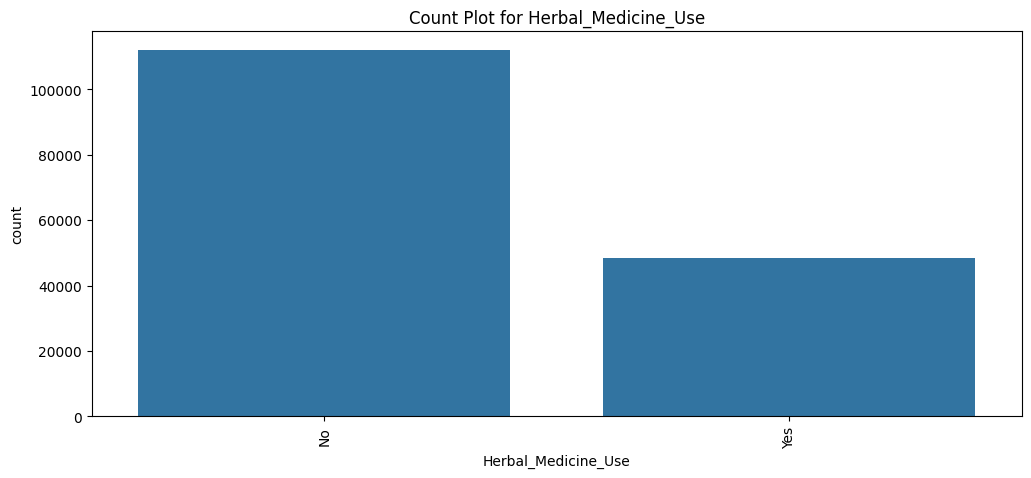

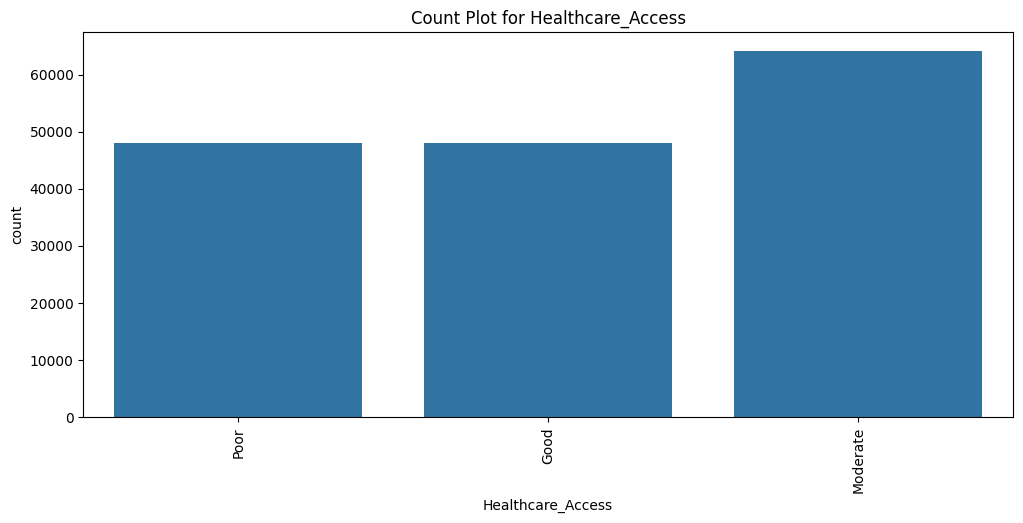

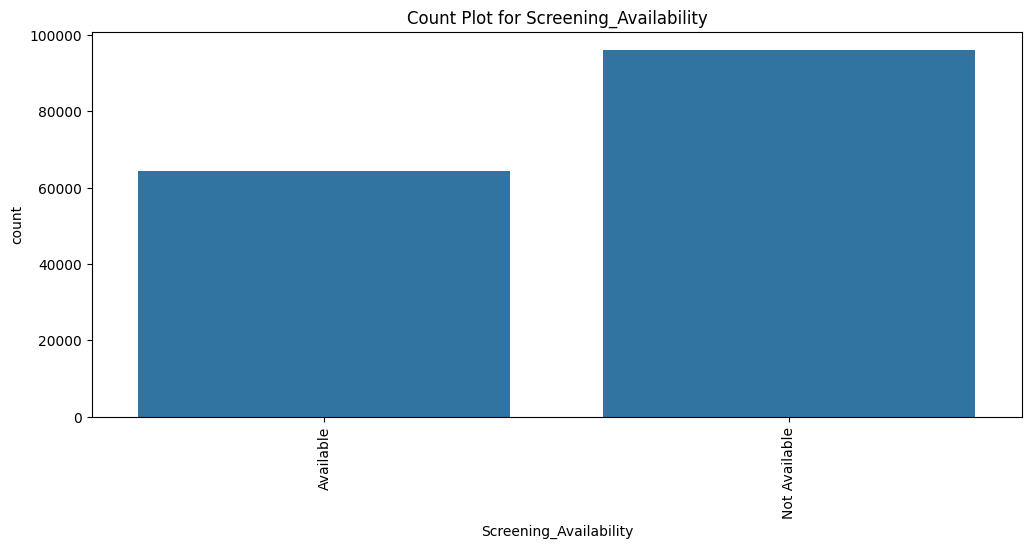

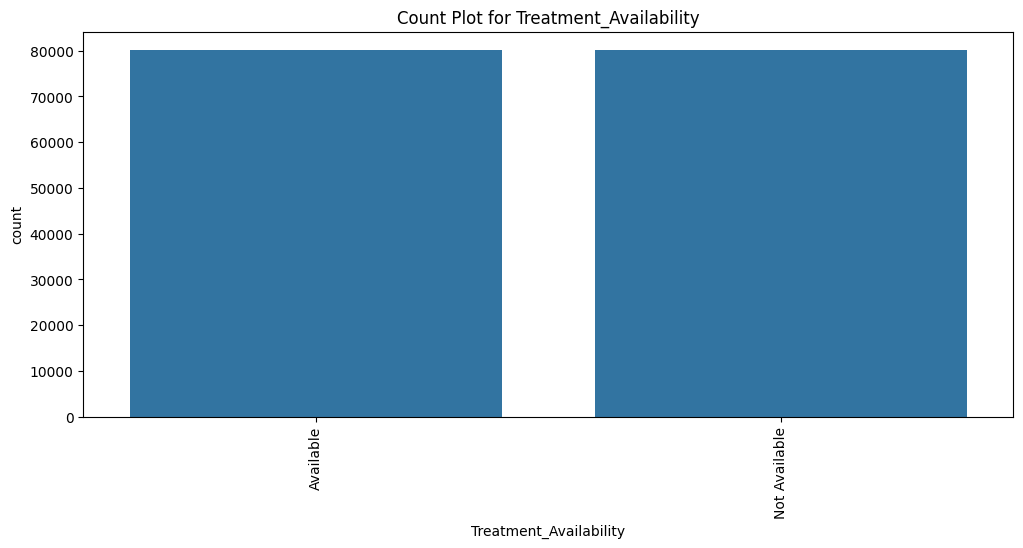

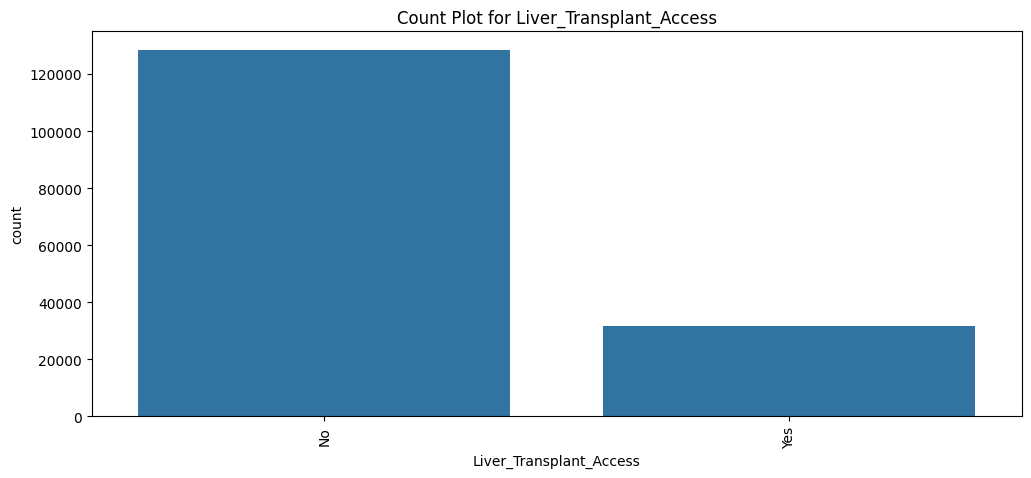

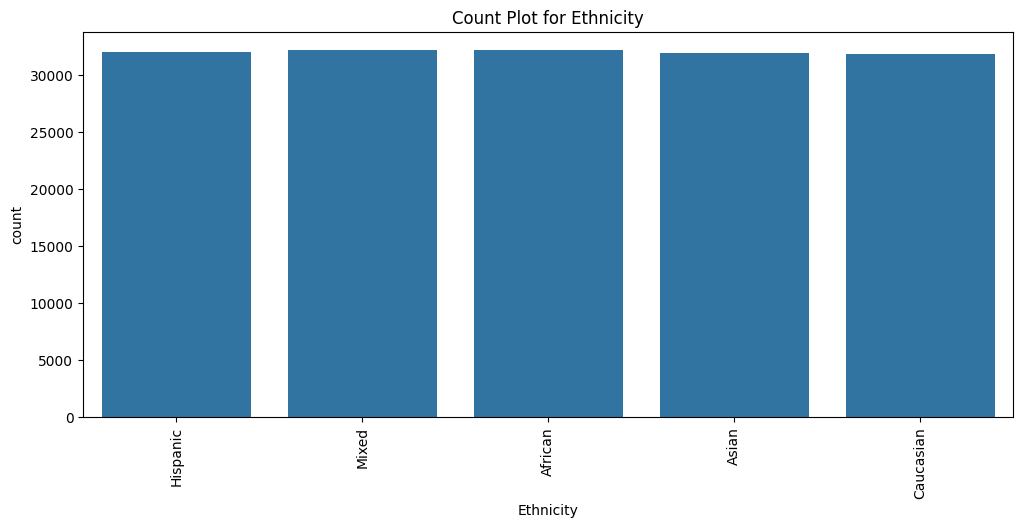

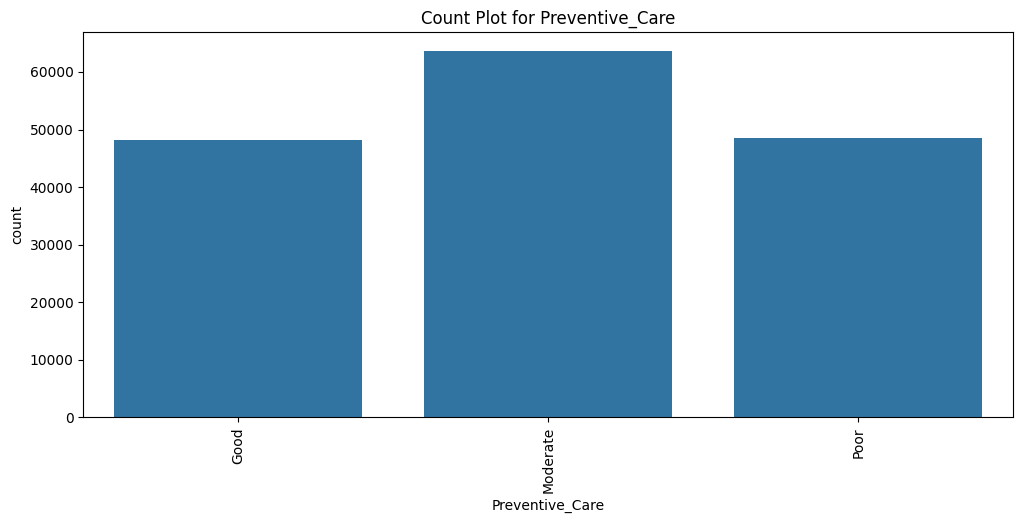

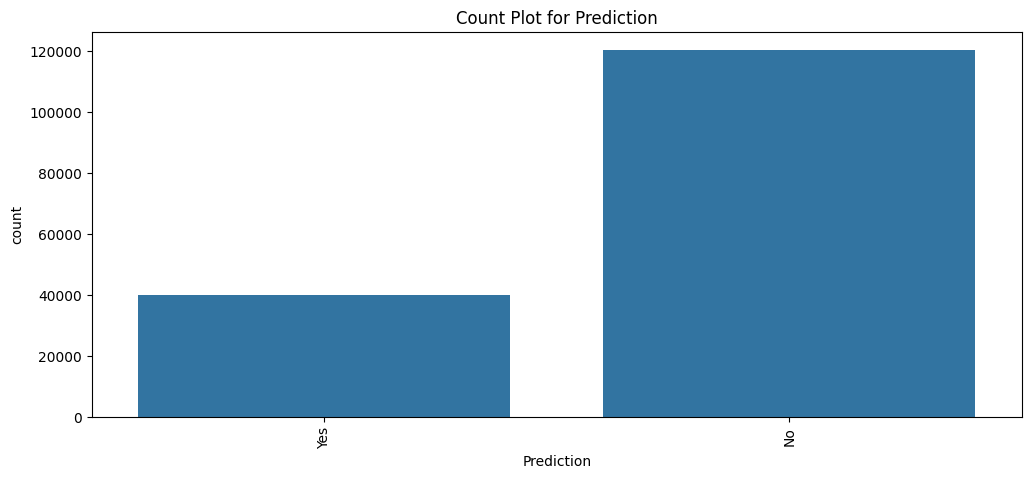

In [16]:
#data visualization on categorical column
for col in cate_col:
  plt.figure(figsize=(12,5))
  sns.countplot(x=col,data=df)
  plt.title(f'Count Plot for {col}')
  plt.xticks(rotation=90)
  plt.show()

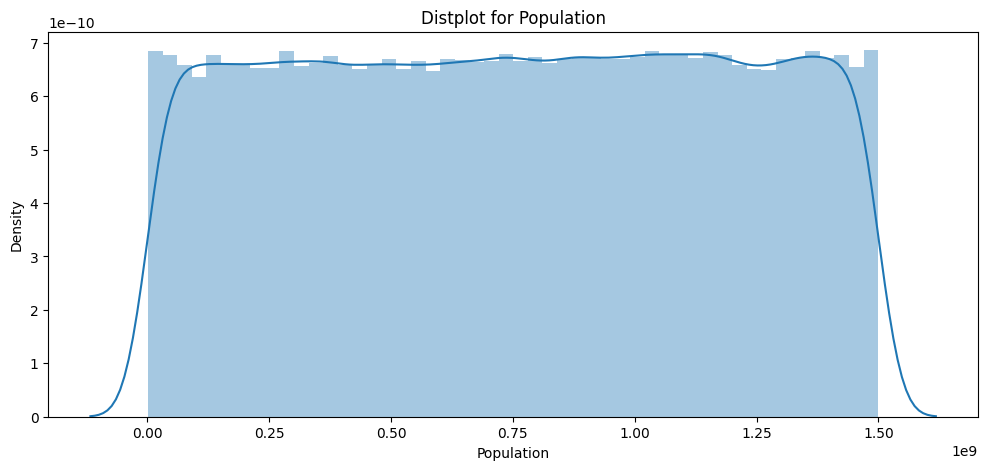

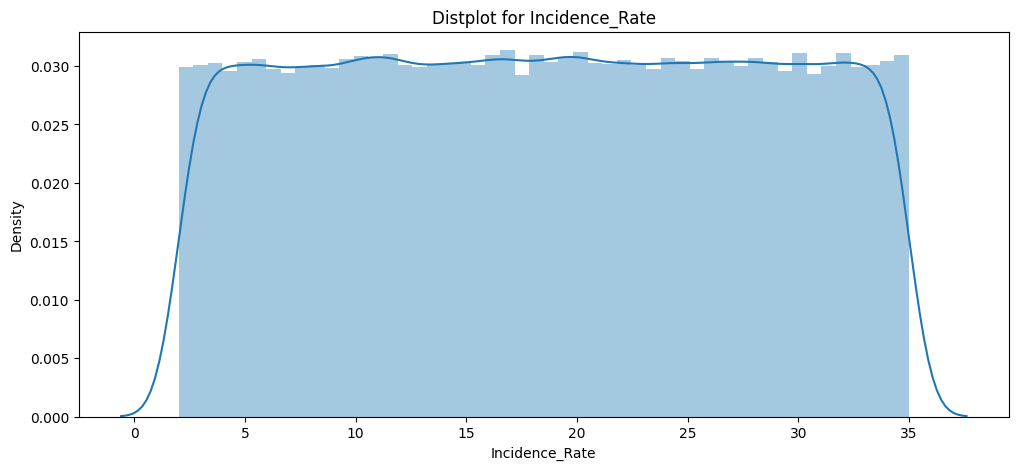

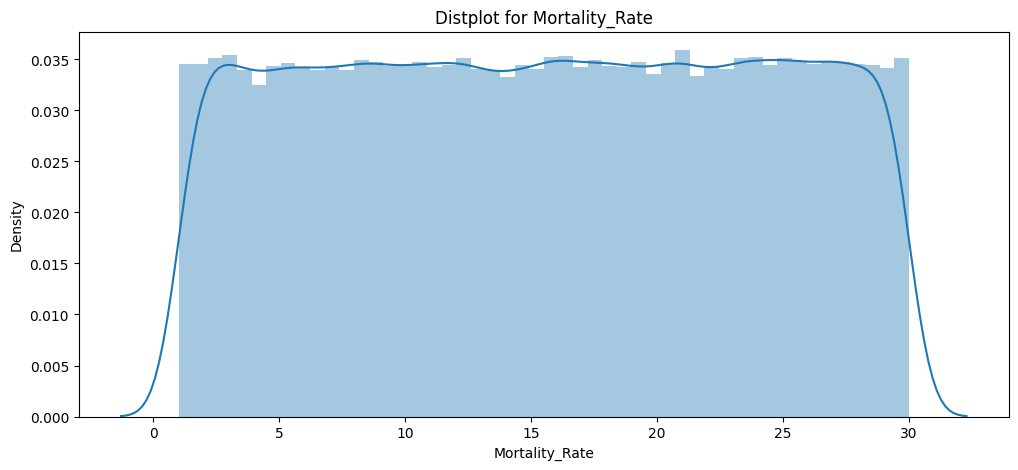

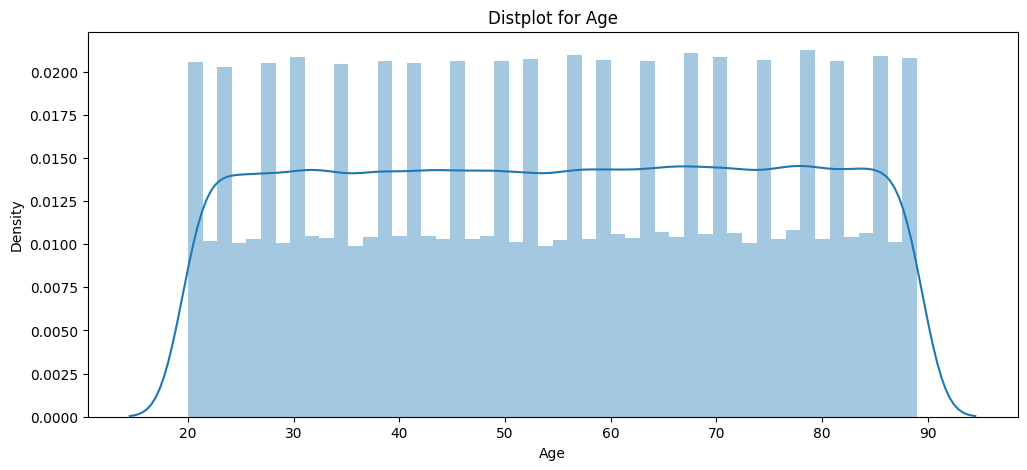

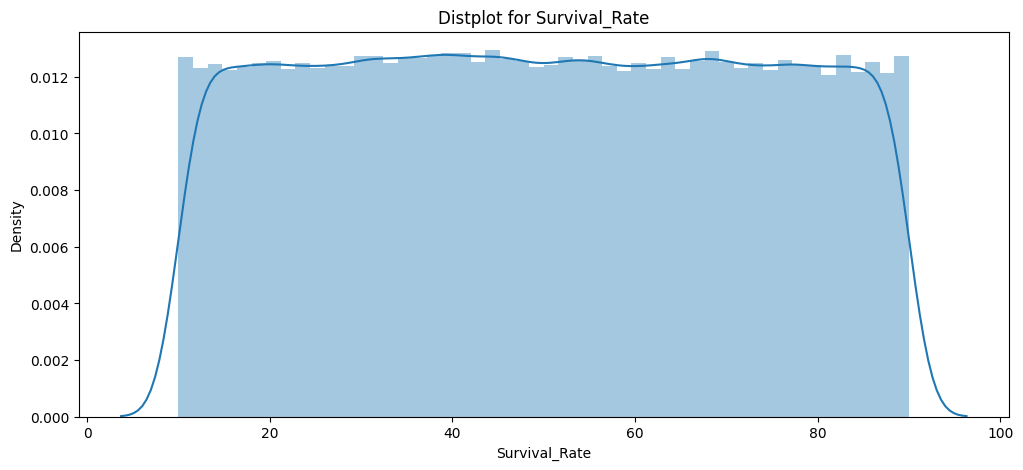

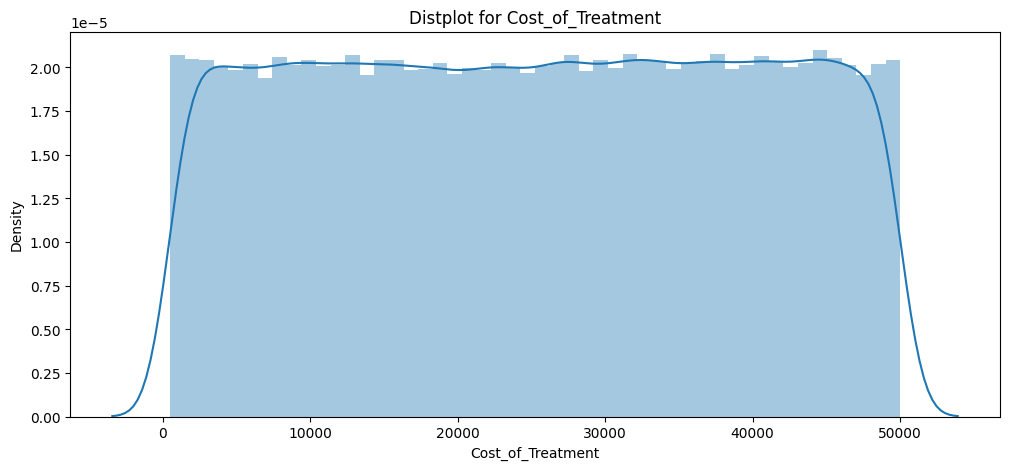

In [17]:
#data visualization numerical distubution
for col in num_col:
  plt.figure(figsize=(12,5))
  sns.distplot(df[col])
  plt.title(f'Distplot for {col}')
  plt.show()

In [18]:
df.columns

Index(['Country', 'Region', 'Population', 'Incidence_Rate', 'Mortality_Rate',
       'Gender', 'Age', 'Alcohol_Consumption', 'Smoking_Status',
       'Hepatitis_B_Status', 'Hepatitis_C_Status', 'Obesity', 'Diabetes',
       'Rural_or_Urban', 'Seafood_Consumption', 'Herbal_Medicine_Use',
       'Healthcare_Access', 'Screening_Availability', 'Treatment_Availability',
       'Liver_Transplant_Access', 'Ethnicity', 'Preventive_Care',
       'Survival_Rate', 'Cost_of_Treatment', 'Prediction'],
      dtype='object')

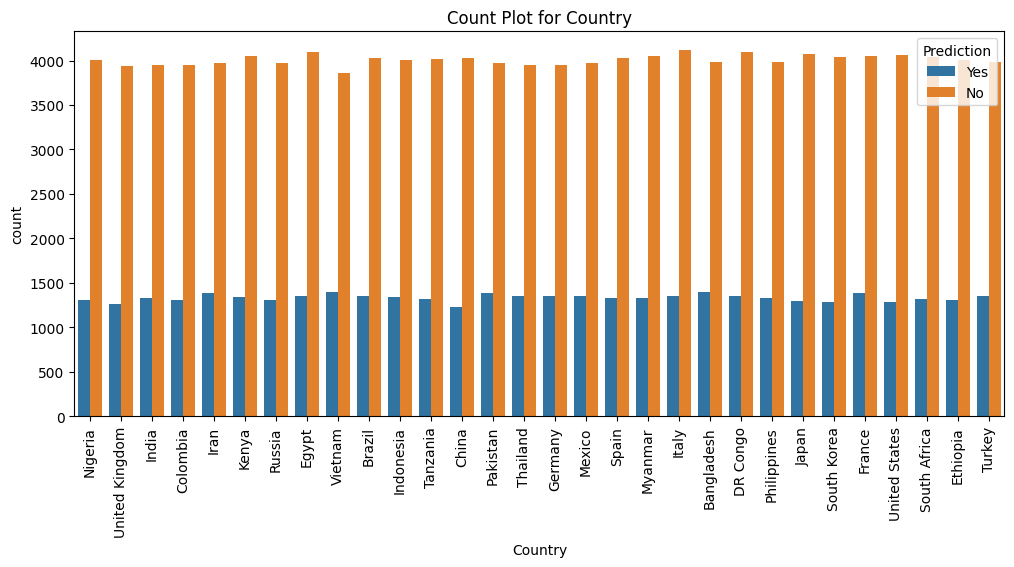

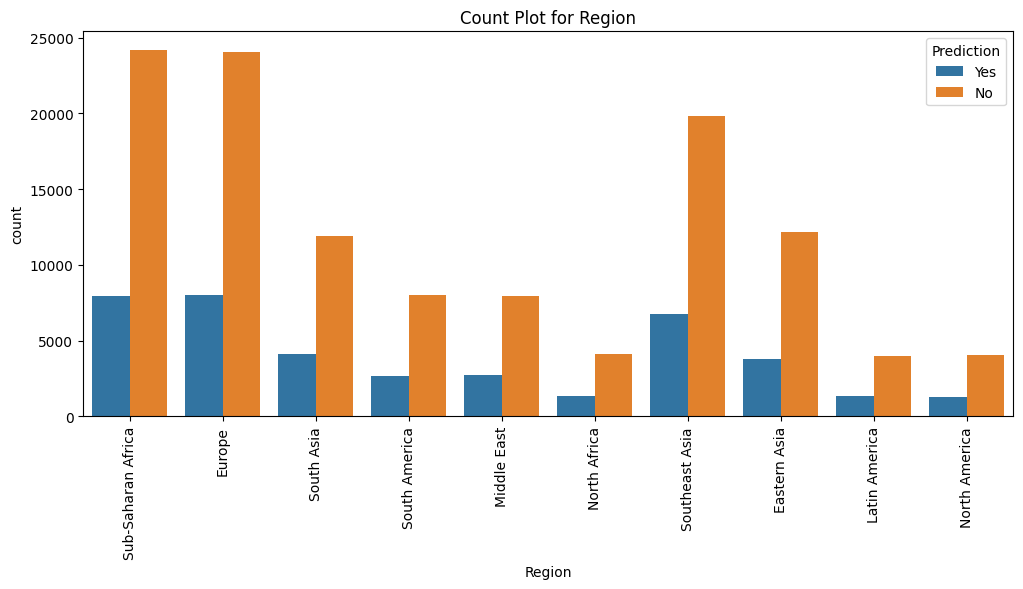

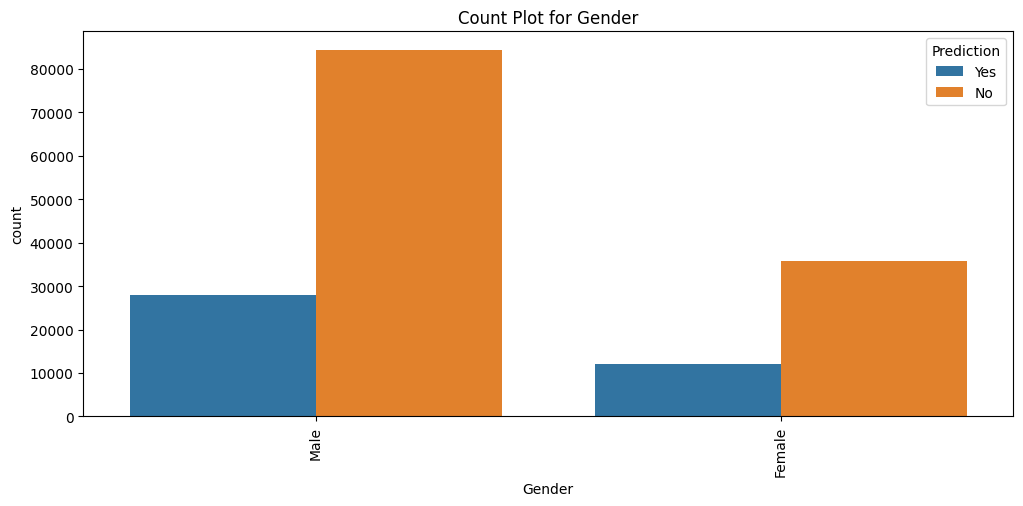

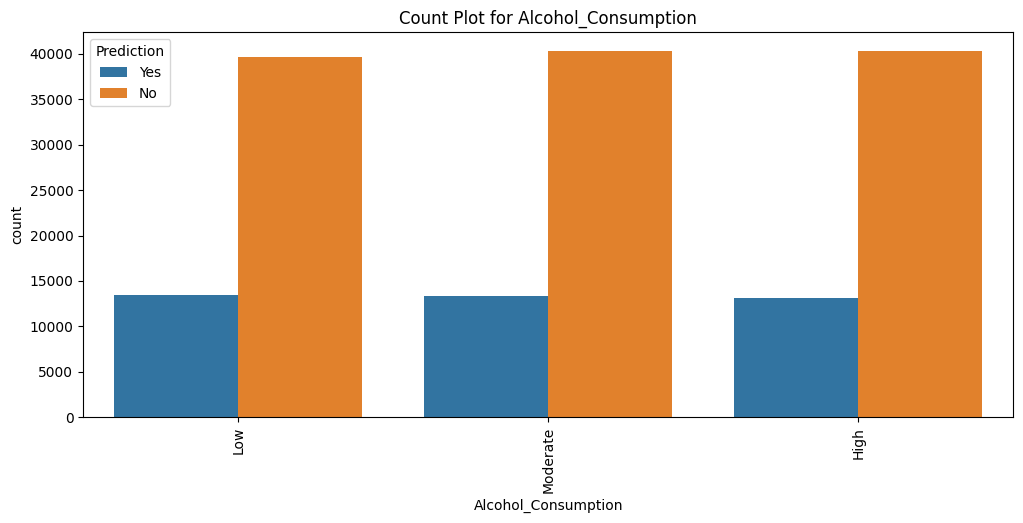

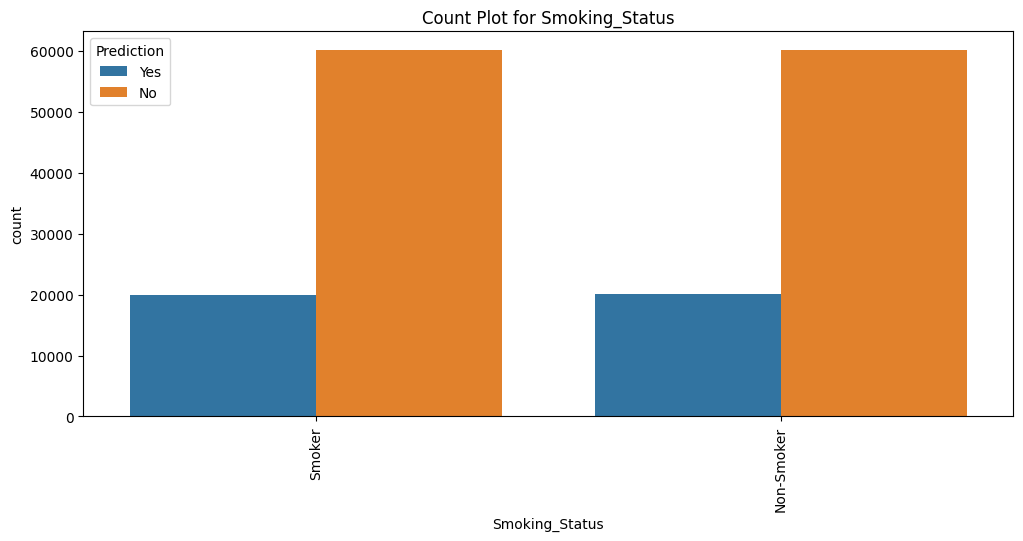

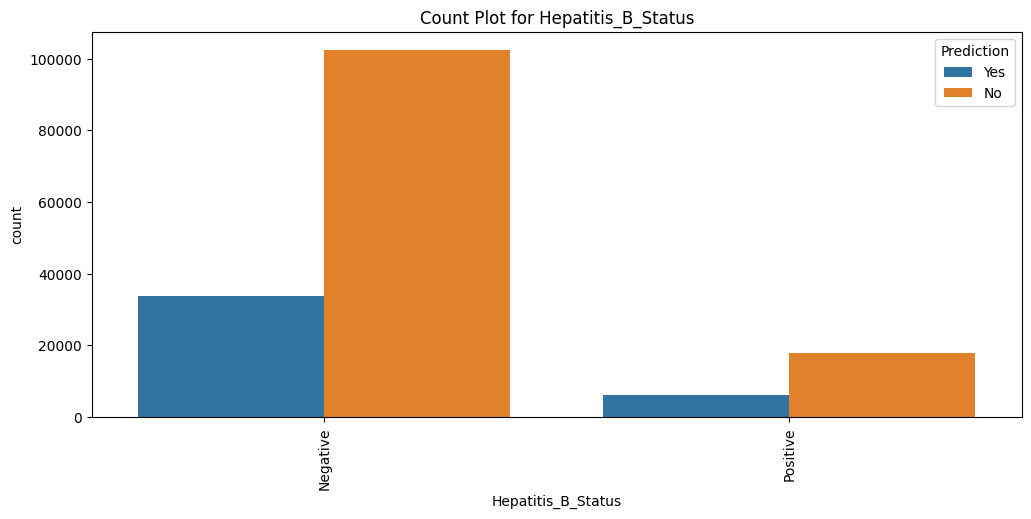

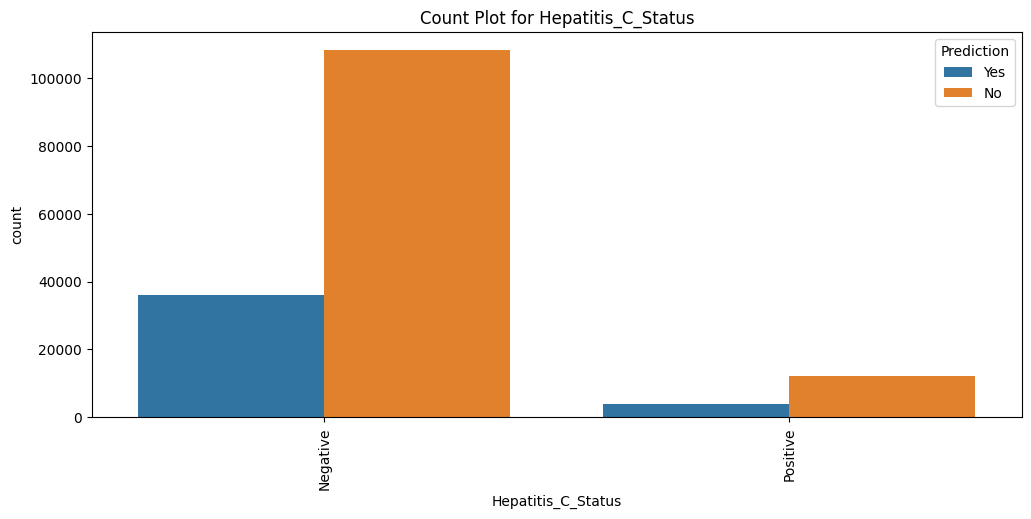

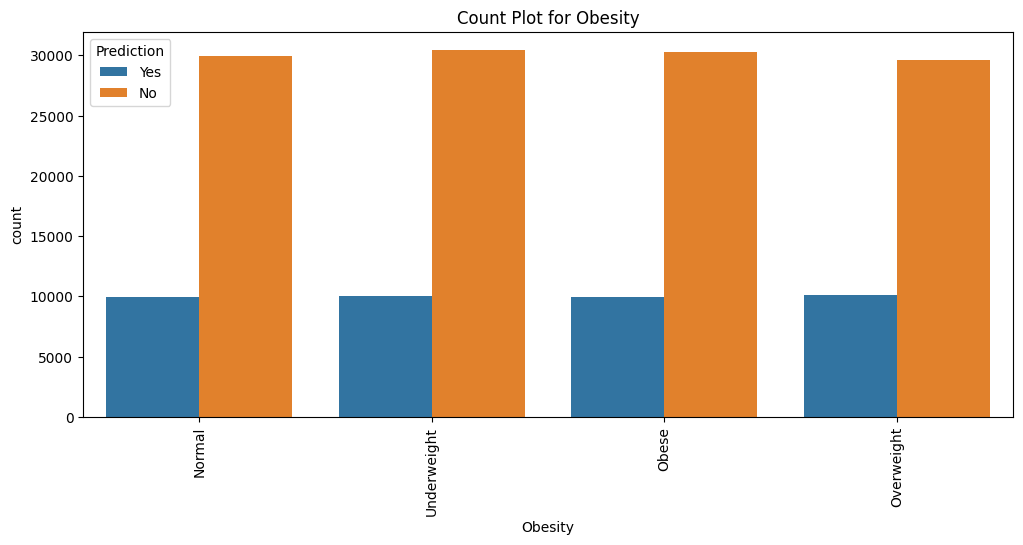

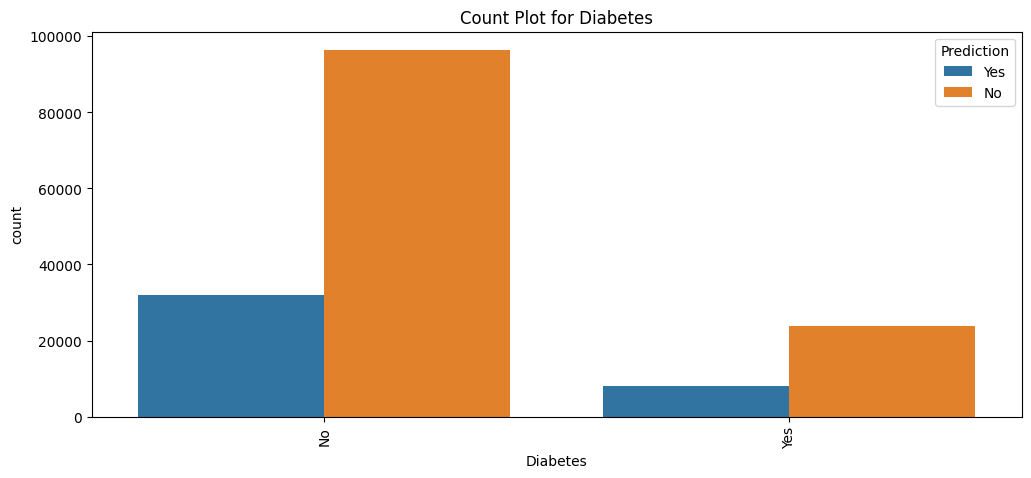

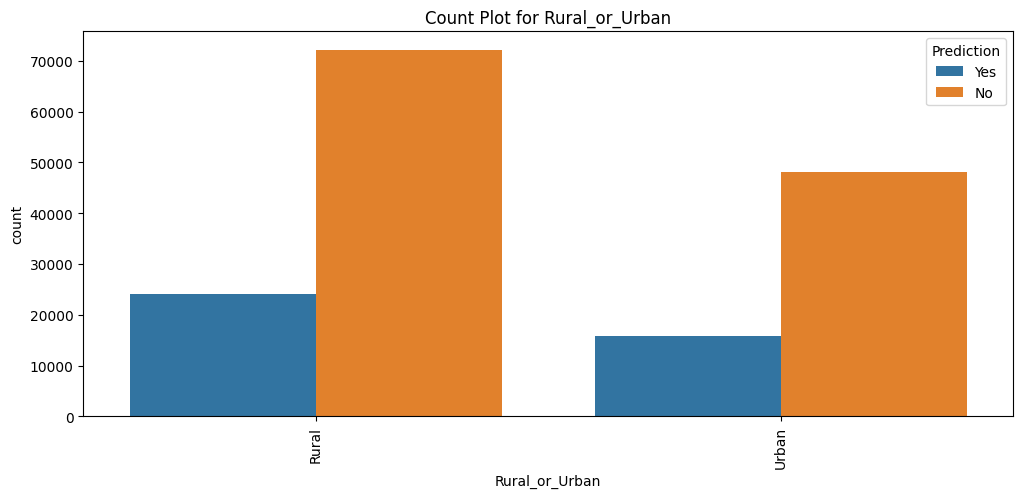

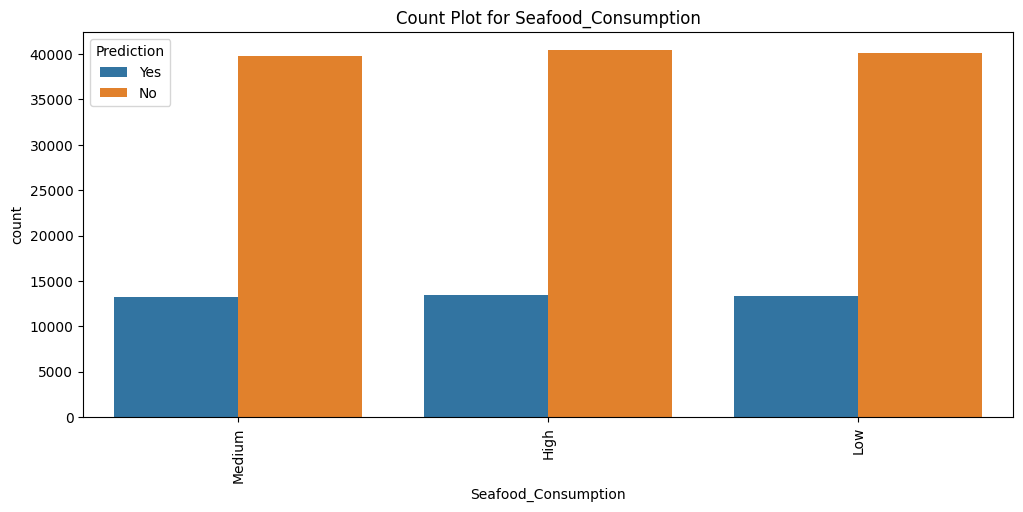

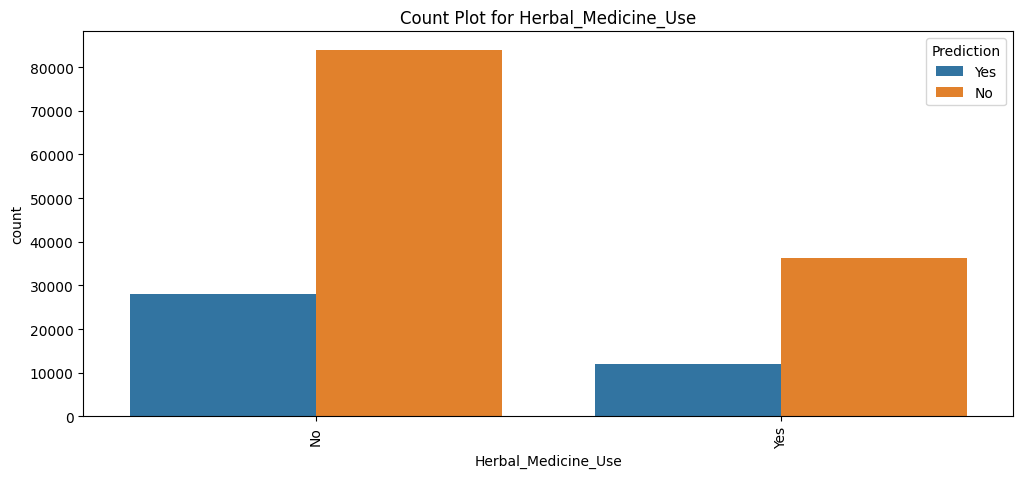

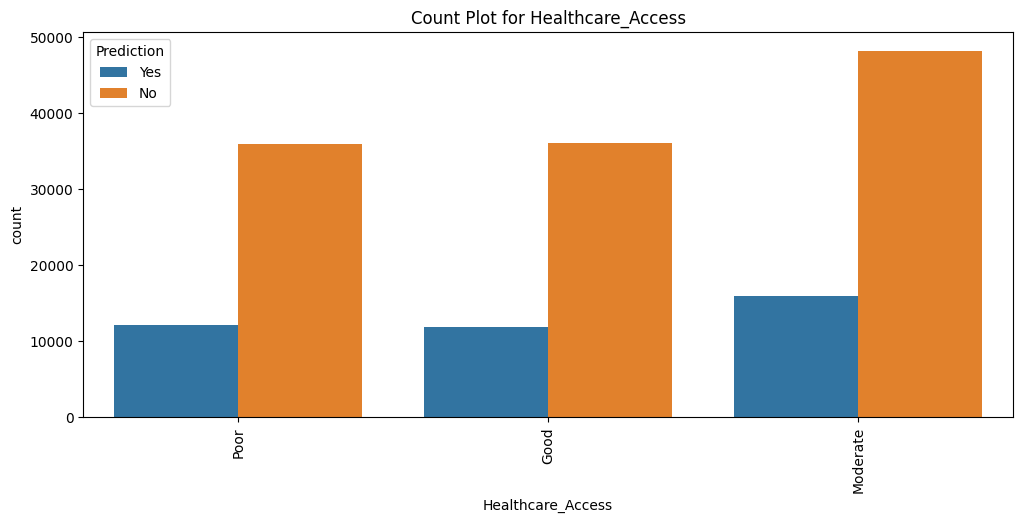

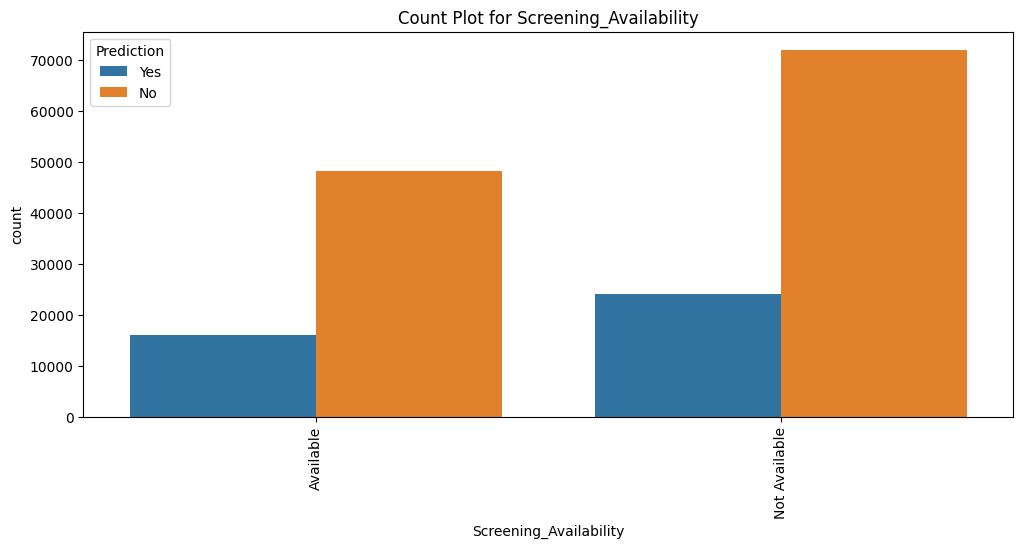

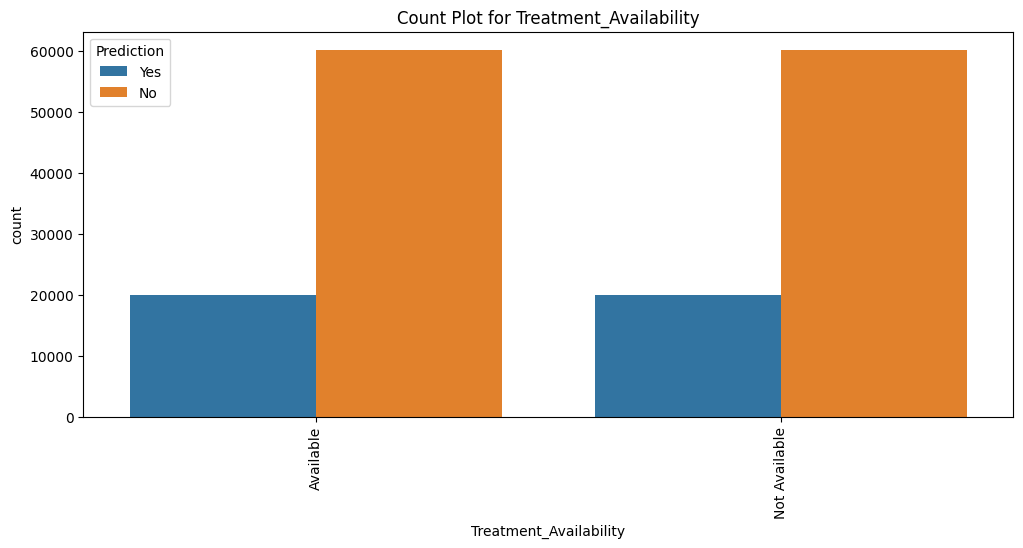

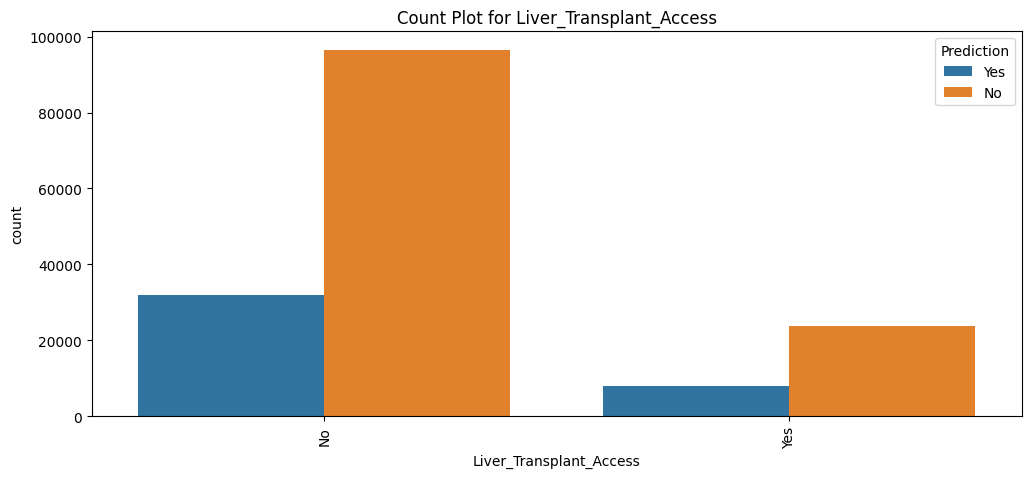

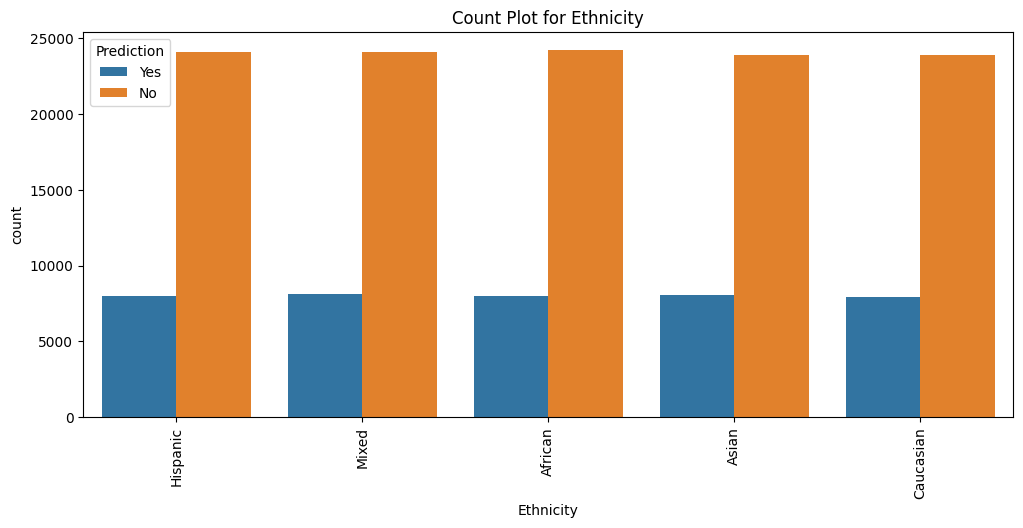

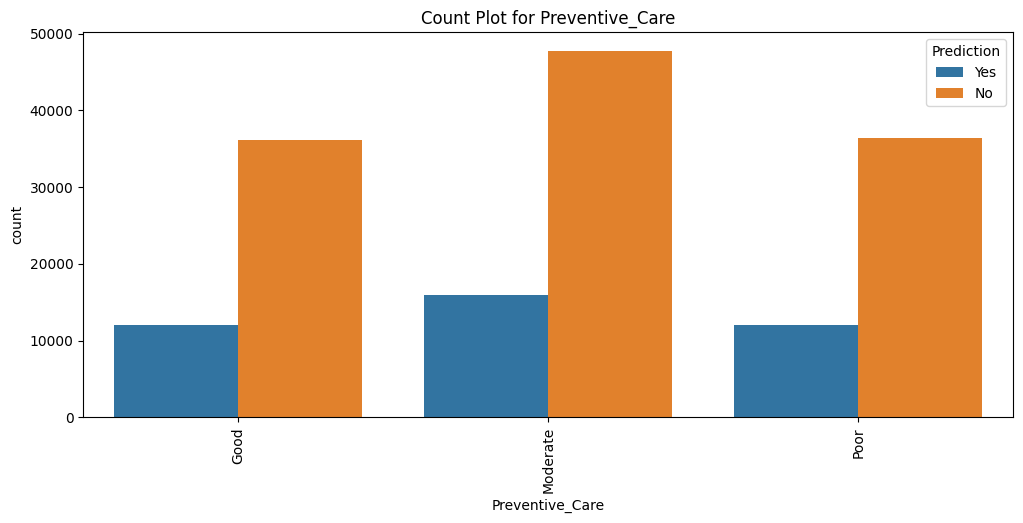

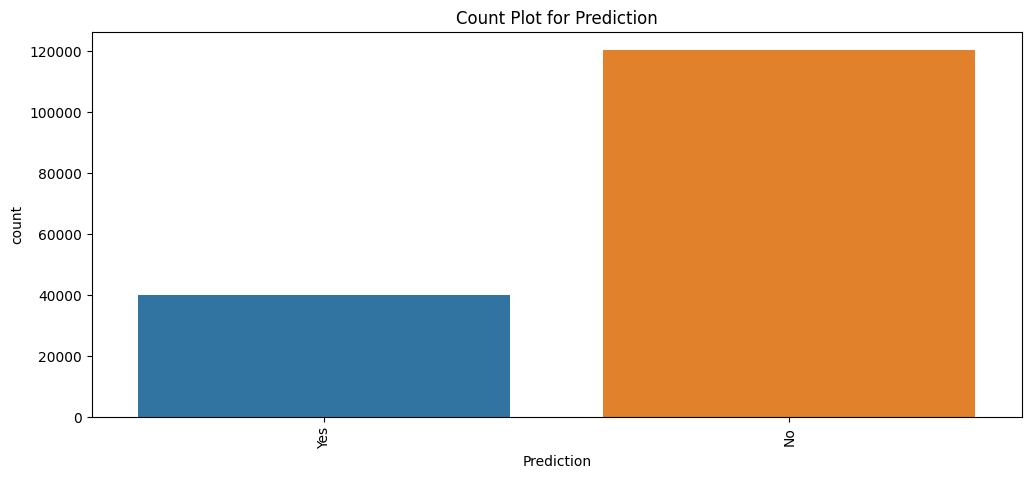

In [19]:
# categorical column compare with target column
for col in cate_col:
  plt.figure(figsize=(12,5))
  sns.countplot(x=col,data=df,hue='Prediction')
  plt.title(f'Count Plot for {col}')
  plt.xticks(rotation=90)
  plt.show()

In [25]:
df.columns

Index(['Country', 'Region', 'Population', 'Incidence_Rate', 'Mortality_Rate',
       'Gender', 'Age', 'Alcohol_Consumption', 'Smoking_Status',
       'Hepatitis_B_Status', 'Hepatitis_C_Status', 'Obesity', 'Diabetes',
       'Rural_or_Urban', 'Seafood_Consumption', 'Herbal_Medicine_Use',
       'Healthcare_Access', 'Screening_Availability', 'Treatment_Availability',
       'Liver_Transplant_Access', 'Ethnicity', 'Preventive_Care',
       'Survival_Rate', 'Cost_of_Treatment', 'Prediction'],
      dtype='object')

In [14]:
#drop the unncessary column to drop
df.drop(columns=['Country', 'Region', 'Population', 'Incidence_Rate', 'Mortality_Rate','Ethnicity','Survival_Rate','Cost_of_Treatment',
       'Gender','Screening_Availability','Treatment_Availability','Liver_Transplant_Access'],inplace=True)

In [15]:
#shape of dataset
df.shape

(160292, 13)

In [19]:
cate_col1=df.select_dtypes(include='object').columns
cate_col1

Index(['Alcohol_Consumption', 'Smoking_Status', 'Hepatitis_B_Status',
       'Hepatitis_C_Status', 'Obesity', 'Diabetes', 'Rural_or_Urban',
       'Seafood_Consumption', 'Herbal_Medicine_Use', 'Healthcare_Access',
       'Preventive_Care', 'Prediction'],
      dtype='object')

#***Encoding:-***

In [22]:
#Label encoding
encoder={}
for col in cate_col1:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  encoder[col]=le

#***Correalation:-***

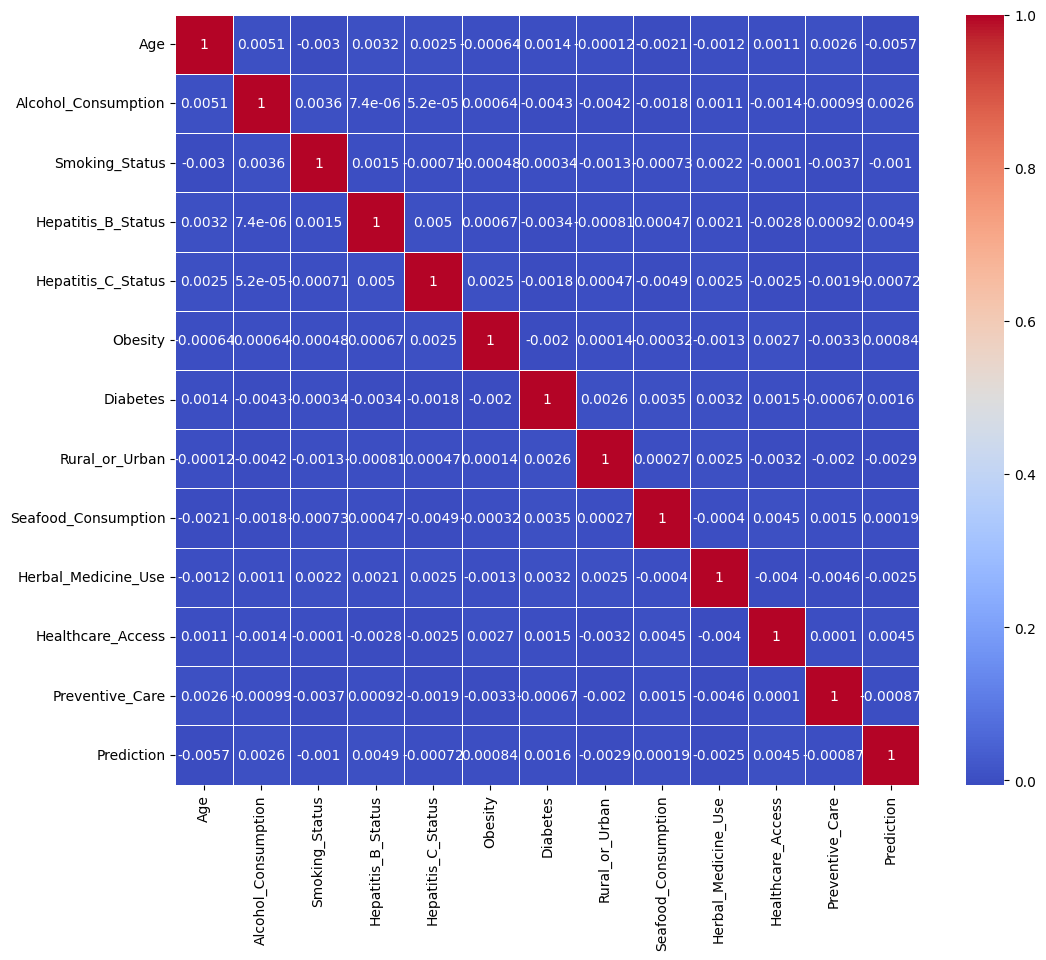

In [25]:
#correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.7)
plt.show()

#***Spliting in to X,y:-***

In [26]:
X=df.drop(columns=['Prediction'])
y=df['Prediction']

In [27]:
y.value_counts()

,count
Prediction,
0,120270
1,40022


***Balancing the Target:-***

In [28]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [30]:
y.value_counts()

,count
Prediction,
1,120270
0,120270


In [31]:
#shape of datsset X,y
X.shape,y.shape

((240540, 12), (240540,))

***Spliting the Train and Test:-***

In [33]:
#Split the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
#shape of train,test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((192432, 12), (48108, 12), (192432,), (48108,))

#***Building Model:-***

In [37]:
model=RandomForestClassifier(random_state=42,n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7150785732102769


#***Save the Model:-***

In [42]:
import joblib
joblib.dump(model,'liver_cancer_prediction.pkl')
joblib.dump(encoder,'encoder.pkl')
print("Save the Model & Encoder")

Save the Model & Encoder
